In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import style
style.use('seaborn-dark')
%matplotlib inline

In [7]:
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf 
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
import folium

In [10]:
pyo.init_notebook_mode(connected= True)
cf.go_offline()

In [11]:
df = pd.read_excel('Covid cases in India.xlsx')

In [12]:
df

S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0        1     Andhra Pradesh                                       12   
1        2       Chhattisgarh                                        6   
2        3              Delhi                                       38   
3        4            Gujarat                                       43   
4        5            Haryana                                       16   
5        6   Himachal Pradesh                                        4   
6        7          Karnataka                                       20   
7        8             Kerala                                      131   
8        9     Madhya Pradesh                                       23   
9       10        Maharashtra                                      144   
10      11             Odisha                                        3   
11      12         Puducherry                                        1   
12      13             Punjab                                       29   
13      14          Rajasthan                                       41   
14      15         Tamil Nadu                                       32   
15      16          Telengana                                       34   
16      17         Chandigarh                                        7   
17      18  Jammu and Kashmir                                       18   
18      19             Ladakh                                       13   
19      20      Uttar Pradesh                                       42   
20      21        Uttarakhand                                        4   
21      22        West Bengal                                       11   
22      23              Bihar                                        7   
23      24            Mizoram                                        1   
24      25                Goa                                        6   
25      26            Manipur                                        1   

    Total Confirmed cases ( Foreign National )  Cured  Death  
0                                            0      1      0  
1                                            0      0      0  
2                                            1      6      1  
3                                            0      0      3  
4                                           14     11      0  
5                                            0      0      1  
6                                            0      3      2  
7                                            7     11      0  
8                                            0      0      1  
9                                            3     15      4  
10                                           0      0      0  
11                                           0      0      0  
12                                           0      0      1  
13                                           2      3      0  
14                                           3      1      1  
15                                          11      1      0  
16                                           0      0      0  
17                                           0      1      1  
18                                           0      0      0  
19                                           1     11      0  
20                                           0      0      0  
21                                           0      0      1  
22                                           0      0      1  
23                                           0      0      0  
24                                           0      0      0  
25                                           0      0      0

In [13]:
df['Total Cases'] = df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [14]:
df

S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0        1     Andhra Pradesh                                       12   
1        2       Chhattisgarh                                        6   
2        3              Delhi                                       38   
3        4            Gujarat                                       43   
4        5            Haryana                                       16   
5        6   Himachal Pradesh                                        4   
6        7          Karnataka                                       20   
7        8             Kerala                                      131   
8        9     Madhya Pradesh                                       23   
9       10        Maharashtra                                      144   
10      11             Odisha                                        3   
11      12         Puducherry                                        1   
12      13             Punjab                                       29   
13      14          Rajasthan                                       41   
14      15         Tamil Nadu                                       32   
15      16          Telengana                                       34   
16      17         Chandigarh                                        7   
17      18  Jammu and Kashmir                                       18   
18      19             Ladakh                                       13   
19      20      Uttar Pradesh                                       42   
20      21        Uttarakhand                                        4   
21      22        West Bengal                                       11   
22      23              Bihar                                        7   
23      24            Mizoram                                        1   
24      25                Goa                                        6   
25      26            Manipur                                        1   

    Total Confirmed cases ( Foreign National )  Cured  Death  Total Cases  
0                                            0      1      0           12  
1                                            0      0      0            6  
2                                            1      6      1           39  
3                                            0      0      3           43  
4                                           14     11      0           30  
5                                            0      0      1            4  
6                                            0      3      2           20  
7                                            7     11      0          138  
8                                            0      0      1           23  
9                                            3     15      4          147  
10                                           0      0      0            3  
11                                           0      0      0            1  
12                                           0      0      1           29  
13                                           2      3      0           43  
14                                           3      1      1           35  
15                                          11      1      0           45  
16                                           0      0      0            7  
17                                           0      1      1           18  
18                                           0      0      0           13  
19                                           1     11      0           43  
20                                           0      0      0            4  
21                                           0      0      1           11  
22                                           0      0      1            7  
23                                           0      0      0            1  
24                                           0      0      0            6  
25                           

In [16]:
Total_cases_overall = df['Total Cases'].sum()
Total_cases_overall

729

In [17]:
df['Active Cases'] = df['Total Cases']- (df["Death"]+df['Cured'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   S. No.                                      26 non-null     int64 
 1   Name of State / UT                          26 non-null     object
 2   Total Confirmed cases (Indian National)     26 non-null     int64 
 3   Total Confirmed cases ( Foreign National )  26 non-null     int64 
 4   Cured                                       26 non-null     int64 
 5   Death                                       26 non-null     int64 
 6   Total Cases                                 26 non-null     int64 
 7   Active Cases                                26 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.6+ KB


In [24]:
df.style.background_gradient(cmap = 'Reds')

In [21]:
Total_Active_Cases=df.groupby('Name of State / UT')['Total Cases'].sum().sort_values(ascending=False).to_frame()

In [22]:
Total_Active_Cases

Total Cases
Name of State / UT             
Maharashtra                 147
Kerala                      138
Telengana                    45
Uttar Pradesh                43
Gujarat                      43
Rajasthan                    43
Delhi                        39
Tamil Nadu                   35
Haryana                      30
Punjab                       29
Madhya Pradesh               23
Karnataka                    20
Jammu and Kashmir            18
Ladakh                       13
Andhra Pradesh               12
West Bengal                  11
Bihar                         7
Chandigarh                    7
Goa                           6
Chhattisgarh                  6
Himachal Pradesh              4
Uttarakhand                   4
Odisha                        3
Manipur                       1
Mizoram                       1
Puducherry                    1

In [23]:
Total_Active_Cases.style.background_gradient(cmap= 'Reds')

<AxesSubplot:xlabel='Name of State / UT'>

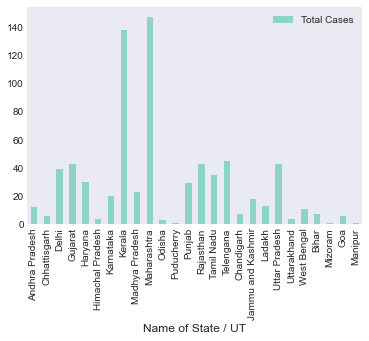

In [25]:
df.plot(kind = 'bar', x = 'Name of State / UT', y ='Total Cases')

<BarContainer object of 26 artists>

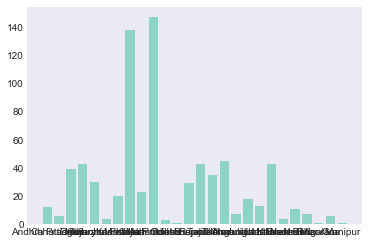

In [26]:
plt.bar(df['Name of State / UT'], height = df['Total Cases'])

In [27]:
px.bar(df, x = 'Name of State / UT', y='Total Cases')

<AxesSubplot:xlabel='Name of State / UT', ylabel='Total Cases'>

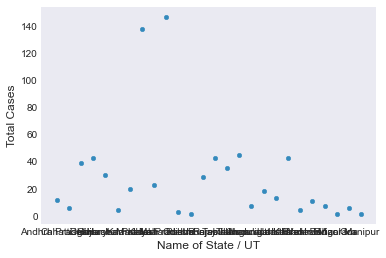

In [28]:
df.plot(kind= 'scatter', x ='Name of State / UT', y = 'Total Cases')

In [29]:
px.scatter(df, x ='Name of State / UT', y = 'Total Cases')

In [31]:
fig = go.Figure()
fig.add_traces(go.Bar(x = df['Name of State / UT'], y = df['Total Cases']))

In [32]:
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Cases'))

In [33]:
Indian_Cord=pd.read_excel(r"Indian Coordinates.xlsx")

In [34]:
Indian_Cord

Name of State / UT   Latitude  Longitude  Unnamed: 3
0                   Andaman And Nicobar   11.667026  92.735983         NaN
1                         Andhra Pradesh  14.750429  78.570026         NaN
2                     Arunachal Pradesh   27.100399  93.616601         NaN
3                                 Assam   26.749981  94.216667         NaN
4                                 Bihar   25.785414  87.479973         NaN
5                            Chandigarh   30.719997  76.780006         NaN
6                          Chhattisgarh   22.090420  82.159987         NaN
7                Dadra And Nagar Haveli   20.266578  73.016618         NaN
8                                  Delhi  28.669993  77.230004         NaN
9                                   Goa   15.491997  73.818001         NaN
10                               Haryana  28.450006  77.019991         NaN
11                     Himachal Pradesh   31.100025  77.166597         NaN
12  Union Territory of Jammu and Kashmir  33.450000  76.240000         NaN
13                            Jharkhand   23.800393  86.419986         NaN
14                             Karnataka  12.570381  76.919997         NaN
15                                Kerala   8.900373  76.569993         NaN
16                          Lakshadweep   10.562573  72.636867         NaN
17                       Madhya Pradesh   21.300391  76.130019         NaN
18                           Maharashtra  19.250232  73.160175         NaN
19                              Manipur   24.799971  93.950017         NaN
20                            Meghalaya   25.570492  91.880014         NaN
21                              Mizoram   23.710399  92.720015         NaN
22                             Nagaland   25.666998  94.116570         NaN
23                               Orissa   19.820430  85.900017         NaN
24                           Puducherry   11.934994  79.830000         NaN
25                                Punjab  31.519974  75.980003         NaN
26                             Rajasthan  26.449999  74.639981         NaN
27                               Sikkim   27.333330  88.616647         NaN
28                             Telengana  18.112400  79.019300         NaN
29                            Tamil Nadu  12.920386  79.150042         NaN
30                              Tripura   23.835404  91.279999         NaN
31                         Uttar Pradesh  27.599981  78.050006         NaN
32                           Uttarakhand  30.320409  78.050006         NaN
33                          West Bengal   22.580390  88.329947         NaN
34             Union Territory of Ladakh  34.100000  77.340000         NaN

In [37]:
df_full = pd.merge(Indian_Cord , df , on= 'Name of State / UT')
df_full

Name of State / UT   Latitude  Longitude  Unnamed: 3  S. No.  \
0      Andhra Pradesh  14.750429  78.570026         NaN       1   
1               Delhi  28.669993  77.230004         NaN       3   
2             Haryana  28.450006  77.019991         NaN       5   
3           Karnataka  12.570381  76.919997         NaN       7   
4              Kerala   8.900373  76.569993         NaN       8   
5         Maharashtra  19.250232  73.160175         NaN      10   
6              Punjab  31.519974  75.980003         NaN      13   
7           Rajasthan  26.449999  74.639981         NaN      14   
8           Telengana  18.112400  79.019300         NaN      16   
9          Tamil Nadu  12.920386  79.150042         NaN      15   
10      Uttar Pradesh  27.599981  78.050006         NaN      20   
11        Uttarakhand  30.320409  78.050006         NaN      21   

    Total Confirmed cases (Indian National)  \
0                                        12   
1                                        38   
2                                        16   
3                                        20   
4                                       131   
5                                       144   
6                                        29   
7                                        41   
8                                        34   
9                                        32   
10                                       42   
11                                        4   

    Total Confirmed cases ( Foreign National )  Cured  Death  Total Cases  \
0                                            0      1      0           12   
1                                            1      6      1           39   
2                                           14     11      0           30   
3                                            0      3      2           20   
4                                            7     11      0          138   
5                                            3     15      4          147   
6                                            0      0      1           29   
7                                            2      3      0           43   
8                                           11      1      0           45   
9                                            3      1      1           35   
10                                           1     11      0           43   
11                                           0      0      0            4   

    Active Cases  
0             11  
1             32  
2             19  
3             15  
4            127  
5            128  
6             28  
7             40  
8             44  
9             33  
10            32  
11             4

In [ ]:
map = folium.Map(location=[20,70], titles = 'Folium Representation', Zoom_start =  4)

In [40]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.2,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.2).add_to(map)
    

In [41]:
map

In [50]:
dbd_India=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="India")
dbd_Italy=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")

In [52]:
dbd_India

Date  Total Cases  New Cases  Days after surpassing 100 cases
0  2020-01-30            1          1                              NaN
1  2020-01-31            1          0                              NaN
2  2020-02-01            1          0                              NaN
3  2020-02-02            2          1                              NaN
4  2020-02-03            3          1                              NaN
5  2020-02-04            3          0                              NaN
6  2020-02-05            3          0                              NaN
7  2020-02-06            3          0                              NaN
8  2020-02-07            3          0                              NaN
9  2020-02-08            3          0                              NaN
10 2020-02-09            3          0                              NaN
11 2020-02-10            3          0                              NaN
12 2020-02-11            3          0                              NaN
13 2020-02-12            3          0                              NaN
14 2020-02-13            3          0                              NaN
15 2020-02-14            3          0                              NaN
16 2020-02-15            3          0                              NaN
17 2020-02-16            3          0                              NaN
18 2020-02-17            3          0                              NaN
19 2020-02-18            3          0                              NaN
20 2020-02-19            3          0                              NaN
21 2020-02-20            3          0                              NaN
22 2020-02-21            3          0                              NaN
23 2020-02-22            3          0                              NaN
24 2020-02-23            3          0                              NaN
25 2020-02-24            3          0                              NaN
26 2020-02-25            3          0                              NaN
27 2020-02-26            3          0                              NaN
28 2020-02-27            3          0                              NaN
29 2020-02-28            3          0                              NaN
30 2020-02-29            3          0                              NaN
31 2020-03-01            3          0                              NaN
32 2020-03-02            6          3                              NaN
33 2020-03-03            9          3                              NaN
34 2020-03-04           28         19                              NaN
35 2020-03-05           30          2                              NaN
36 2020-03-06           31          1                              NaN
37 2020-03-07           34          3                              NaN
38 2020-03-08           39          5                              NaN
39 2020-03-09           43          4                              NaN
40 2020-03-10           56         13                              NaN
41 2020-03-11           62          6                              NaN
42 2020-03-12           73         11                              NaN
43 2020-03-13           82          9                              NaN
44 2020-03-14          102         20                              0.0
45 2020-03-15          113         11                              1.0
46 2020-03-16          119          6                              2.0
47 2020-03-17          142         23                              3.0
48 2020-03-18          156         14                              4.0
49 2020-03-19          194         38                              5.0
50 2020-03-20          244         50                              6.0
51 2020-03-21          271         27                              7.0

In [56]:
fig  = px.bar(dbd_India,x="Date", y='Total Cases',title = 'Confirmed cases in India', color= 'Total Cases')
fig.show()

In [57]:
fig  = px.bar(dbd_Wuhan,x="Date", y='Total Cases',title = 'Confirmed cases in Wuhan', color= 'Total Cases')
fig.show()

In [58]:
fig  = px.scatter(dbd_Wuhan,x="Date", y='Total Cases',title = 'Confirmed cases in Wuhan', color= 'Total Cases')
fig.show()

In [59]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= dbd_India['Date'], y= dbd_India['Total Cases'], mode ='lines+markers') )

In [63]:
df=pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])

In [65]:
df

SNo ObservationDate                Province/State  \
0        1      01/22/2020                         Anhui   
1        2      01/22/2020                       Beijing   
2        3      01/22/2020                     Chongqing   
3        4      01/22/2020                        Fujian   
4        5      01/22/2020                         Gansu   
...    ...             ...                           ...   
5885  5886      03/15/2020                     Gibraltar   
5886  5887      03/15/2020                           NaN   
5887  5888      03/15/2020  Diamond Princess cruise ship   
5888  5889      03/15/2020                 West Virginia   
5889  5890      03/15/2020                           NaN   

                      Country/Region         Last Update  Confirmed  Deaths  \
0                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
1                     Mainland China 2020-01-22 17:00:00       14.0     0.0   
2                     Mainland China 2020-01-22 17:00:00        6.0     0.0   
3                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
4                     Mainland China 2020-01-22 17:00:00        0.0     0.0   
...                              ...                 ...        ...     ...   
5885                              UK 2020-03-14 16:33:03        1.0     0.0   
5886                      Uzbekistan 2020-03-15 18:20:19        1.0     0.0   
5887                       Australia 2020-03-14 02:33:04        0.0     0.0   
5888                              US 2020-03-10 02:33:04        0.0     0.0   
5889  occupied Palestinian territory 2020-03-11 20:53:02        0.0     0.0   

      Recovered  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
5885        1.0  
5886        0.0  
5887        0.0  
5888        0.0  
5889        0.0  

[5890 rows x 8 columns]

In [66]:
df["Last Update"]

0      2020-01-22 17:00:00
1      2020-01-22 17:00:00
2      2020-01-22 17:00:00
3      2020-01-22 17:00:00
4      2020-01-22 17:00:00
               ...        
5885   2020-03-14 16:33:03
5886   2020-03-15 18:20:19
5887   2020-03-14 02:33:04
5888   2020-03-10 02:33:04
5889   2020-03-11 20:53:02
Name: Last Update, Length: 5890, dtype: datetime64[ns]

In [67]:
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [68]:
df

SNo        Date                Province/State  \
0        1  01/22/2020                         Anhui   
1        2  01/22/2020                       Beijing   
2        3  01/22/2020                     Chongqing   
3        4  01/22/2020                        Fujian   
4        5  01/22/2020                         Gansu   
...    ...         ...                           ...   
5885  5886  03/15/2020                     Gibraltar   
5886  5887  03/15/2020                           NaN   
5887  5888  03/15/2020  Diamond Princess cruise ship   
5888  5889  03/15/2020                 West Virginia   
5889  5890  03/15/2020                           NaN   

                             Country         Last Update  Confirmed  Deaths  \
0                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
1                     Mainland China 2020-01-22 17:00:00       14.0     0.0   
2                     Mainland China 2020-01-22 17:00:00        6.0     0.0   
3                     Mainland China 2020-01-22 17:00:00        1.0     0.0   
4                     Mainland China 2020-01-22 17:00:00        0.0     0.0   
...                              ...                 ...        ...     ...   
5885                              UK 2020-03-14 16:33:03        1.0     0.0   
5886                      Uzbekistan 2020-03-15 18:20:19        1.0     0.0   
5887                       Australia 2020-03-14 02:33:04        0.0     0.0   
5888                              US 2020-03-10 02:33:04        0.0     0.0   
5889  occupied Palestinian territory 2020-03-11 20:53:02        0.0     0.0   

      Recovered  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
5885        1.0  
5886        0.0  
5887        0.0  
5888        0.0  
5889        0.0  

[5890 rows x 8 columns]

In [69]:
df.query('Country=="UK"')

SNo        Date   Province/State Country         Last Update  \
481    482  01/31/2020              NaN      UK 2020-01-31 23:59:00   
541    542  02/01/2020              NaN      UK 2020-02-01 01:52:00   
611    612  02/02/2020              NaN      UK 2020-02-01 01:52:40   
678    679  02/03/2020              NaN      UK 2020-02-01 01:52:40   
746    747  02/04/2020              NaN      UK 2020-02-01 01:52:40   
817    818  02/05/2020              NaN      UK 2020-02-01 01:52:40   
888    889  02/06/2020              NaN      UK 2020-02-01 01:52:40   
957    958  02/07/2020              NaN      UK 2020-02-07 18:33:02   
1029  1030  02/08/2020              NaN      UK 2020-02-07 18:33:02   
1101  1102  02/09/2020              NaN      UK 2020-02-07 18:33:02   
1165  1166  02/10/2020              NaN      UK 2020-02-10 19:03:02   
1237  1238  02/11/2020              NaN      UK 2020-02-10 19:03:02   
1310  1311  02/12/2020              NaN      UK 2020-02-12 19:03:06   
1383  1384  02/13/2020              NaN      UK 2020-02-12 19:03:06   
1457  1458  02/14/2020              NaN      UK 2020-02-12 19:03:06   
1532  1533  02/15/2020              NaN      UK 2020-02-12 19:03:06   
1607  1608  02/16/2020              NaN      UK 2020-02-16 16:23:06   
1682  1683  02/17/2020              NaN      UK 2020-02-16 16:23:06   
1757  1758  02/18/2020              NaN      UK 2020-02-16 16:23:06   
1832  1833  02/19/2020              NaN      UK 2020-02-16 16:23:06   
1908  1909  02/20/2020              NaN      UK 2020-02-16 16:23:06   
1987  1988  02/21/2020              NaN      UK 2020-02-16 16:23:06   
2072  2073  02/22/2020              NaN      UK 2020-02-16 16:23:06   
2156  2157  02/23/2020              NaN      UK 2020-02-16 16:23:06   
2238  2239  02/24/2020              NaN      UK 2020-02-24 08:33:02   
2330  2331  02/25/2020              NaN      UK 2020-02-24 08:33:02   
2426  2427  02/26/2020              NaN      UK 2020-02-24 08:33:02   
2527  2528  02/27/2020              NaN      UK 2020-02-27 13:23:02   
2630  2631  02/28/2020              NaN      UK 2020-02-28 20:13:09   
2744  2745  02/29/2020              NaN      UK 2020-02-29 18:03:05   
2862  2863  03/01/2020              NaN      UK 2020-03-01 23:23:02   
2988  2989  03/02/2020              NaN      UK 2020-03-02 20:33:02   
3125  3126  03/03/2020              NaN      UK 2020-03-03 15:13:26   
3272  3273  03/04/2020              NaN      UK 2020-03-04 19:33:03   
3428  3429  03/05/2020              NaN      UK 2020-03-05 18:03:03   
3597  3598  03/06/2020              NaN      UK 2020-03-06 15:33:03   
3794  3795  03/07/2020              NaN      UK 2020-03-07 17:43:05   
4017  4018  03/08/2020              NaN      UK 2020-03-08 22:03:10   
4271  4272  03/09/2020              NaN      UK 2020-03-09 18:33:03   
4537  4538  03/10/2020              NaN      UK 2020-03-10 23:53:02   
4743  4744  03/11/2020               UK      UK 2020-03-11 21:33:03   
4896  4897  03/11/2020  Channel Islands      UK 2020-03-11 20:53:02   
4923  4924  03/11/2020        Gibraltar      UK 2020-03-11 20:53:02   
4960  4961  03/12/2020               UK      UK 2020-03-11 21:33:03   
5118  5119  03/12/2020  Channel Islands      UK 2020-03-11 20:53:02   
5144  5145  03/12/2020        Gibraltar      UK 2020-03-11 20:53:02   
5196  5197  03/13/2020  Channel Islands      UK 2020-03-11 20:00:00   
5239  5240  03/13/2020   United Kingdom      UK 2020-03-11 20:00:00   
5289  5290  03/13/2020        Gibraltar      UK 2020-03-11 20:00:00   
5394  5395  03/14/2020   United Kingdom      UK 2020-03-14 14:53:04   
5593  5594  03/14/2020  Channel Islands      UK 2020-03-11 20:53:02   
5628  5629  03/14/2020        Gibraltar      UK 2020-03-14 16:33:03   
5644  5645  03/15/2020   United Kingdom      UK 2020-03-14 14:53:04   
5833  5834  03/15/2020  Channel Islands      UK 2020-03-15 18:20:19   
5885  5886  03/15/2020        Gibraltar      UK 2020-03-14 16:33:03   

      Confirmed  Deaths  Recov

In [70]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()
rec=df.groupby('Date').sum()['Recovered'].reset_index()

In [71]:
df.groupby('Date')['Confirmed']

In [72]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))
